**Lojistik Regresyon**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Veri setini oku
df = pd.read_excel('/content/drive/MyDrive/sade1.xlsx')

# Marka ve kategori arasındaki ilişkiyi gösteren bir sözlük oluştur
marka_kategori_iliskisi = {}

# Veri setindeki her satırı dolaş
for index, row in df.iterrows():
    marka = row['marka']  # Marka sütunundan marka adını al
    kategori = row['kategori']  # Kategori sütunundan kategori adını al

    # Marka daha önce sözlükte yoksa, yeni bir giriş oluştur
    if marka not in marka_kategori_iliskisi:
        marka_kategori_iliskisi[marka] = set()  # Kategorileri depolamak için bir küme kullan

    # Kategorileri kümeye ekle, ancak önce stringe dönüştür
    marka_kategori_iliskisi[marka].add(str(kategori)) # Changed here

# Sonuçları yazdır
for marka, kategoriler in marka_kategori_iliskisi.items():
    print(f"{marka} markası şu kategorilerden sipariş verdi: {', '.join(kategoriler)}")

0 markası şu kategorilerden sipariş verdi: 2, 0, 1, 3
1 markası şu kategorilerden sipariş verdi: 2, 0, 1, 3
2 markası şu kategorilerden sipariş verdi: 2, 0, 1, 3


In [ ]:
#gerekli kütüphaneleri yükleme
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Verilerinizi içeren DataFrame'i 'df' olarak adlandırma ve değişken belirleme
X = df[['marka', 'kategori']]  # Bağımsız değişkenler
y = df['siparişmiktarı']  # Bağımlı değişken

# Sipariş miktarlarını sınıflara ayırın (örneğin, ortalama değere göre)
ortalama_sipariş = y.mean()
y = (y > ortalama_sipariş).astype(int)  # Yüksek sipariş: 1, Düşük sipariş: 0
# Verilerinizi içeren DataFrame'i 'df' olarak adlandırın
X = df[['marka', 'kategori']]  # Bağımsız değişkenler
y = df['siparişmiktarı']  # Bağımlı değişken

# Sipariş miktarlarını sınıflara ayırma (örneğin, ortalama değere göre)
ortalama_sipariş = y.mean()
y = (y > ortalama_sipariş).astype(int)  # Yüksek sipariş: 1, Düşük sipariş: 0

# Veriyi eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test_size and random_state added

In [ ]:
# Lojistik Regresyon modelini oluşturma
model = LogisticRegression(random_state=42)

# Modeli eğitim verileriyle eğitin
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Model Doğruluğunu Yorumlama:

Orta Düzey Doğruluk: Bu doğruluk oranı, genellikle orta düzey bir doğruluk olarak kabul edilir. Modeliniz, tahminlerde bulunurken rastgele tahminden daha iyi performans gösteriyor, ancak mükemmel olmaktan uzak.

In [ ]:
# Lojistik Regresyon modelini oluşturma
model = LogisticRegression(random_state=42)

# Modeli eğitim verileriyle eğitin
model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapın
y_pred = model.predict(X_test) # This line was added

# Doğruluk oranı (accuracy) ile model performansını değerlendirin
doğruluk = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {doğruluk}")

Doğruluk Oranı: 0.6337448559670782


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#Model İyileştirme: lojistik regresyonda parametre uzayı,modelin performansını
#optimize etmek için hiperparametrelerin alabileceği olası değerlerin aralığını tanımlar.

parametre_uzayı = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],

    'C': [0.1, 1, 10, 100],

}

In [ ]:
#GridSearchCV ve RandomizedSearchCV, makine öğrenmesi modellerinin hiperparametrelerini
#optimize etmek için kullanılan güçlü araçlardır.
grid_search = GridSearchCV(LogisticRegression(random_state=42), parametre_uzayı, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk oranı:", grid_search.best_score_)

En iyi parametreler: {'C': 0.1, 'penalty': 'l2'}
En iyi doğruluk oranı: 0.6770311414988515


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

In [ ]:
random_search = RandomizedSearchCV(LogisticRegression(random_state=42), parametre_uzayı, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi doğruluk oranı:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


En iyi parametreler: {'penalty': 'l2', 'C': 0.1}
En iyi doğruluk oranı: 0.6770311414988515


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

In [ ]:
en_iyi_model = LogisticRegression(**grid_search.best_params_, random_state=42)  # veya random_search.best_params_
en_iyi_model.fit(X_train, y_train)

y_pred = en_iyi_model.predict(X_test)
doğruluk = accuracy_score(y_test, y_pred)
print(f"Test Doğruluk Oranı: {doğruluk}")

Test Doğruluk Oranı: 0.6337448559670782


Model Doğruluk Değerlendirme Test Doğruluk Oranı: 0.6337448559670782'dır yapılan iyileştirmeler işe yaramamıştır.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


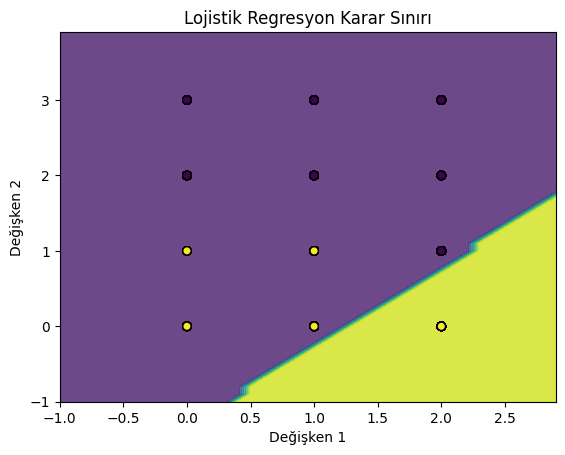

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the DataFrame to a NumPy array for slicing
X_np = X.to_numpy()  # Convert X to a NumPy array

# Değişkenlerin değer aralığını belirleyin
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1  # Use X_np for slicing
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1  # Use X_np for slicing

# Değer aralığında bir grid oluşturun
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Grid üzerindeki noktalar için tahmin yapın
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Karar sınırını ve veri noktalarını çizin
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_np[:, 0], X_np[:, 1], c=y, edgecolors='k')  # Use X_np for scattering
plt.xlabel('Değişken 1')
plt.ylabel('Değişken 2')
plt.title('Lojistik Regresyon Karar Sınırı')
plt.show()

In [ ]:
# Tahmin fonksiyonu
def siparis_miktari_tahmin_et(marka, kategori):
    yeni_veri = pd.DataFrame({'marka': [marka], 'kategori': [kategori]})

    tahmin = model.predict(yeni_veri)[0]

    return tahmin

# Örnek kullanım
marka = "1"
kategori = "3"

tahmin_edilen_miktar = siparis_miktari_tahmin_et(marka, kategori)
print(f"Marka: {marka}, Kategori: {kategori} için tahmin edilen sipariş miktarı: {tahmin_edilen_miktar}")

Marka: 1, Kategori: 3 için tahmin edilen sipariş miktarı: 0
